# Introduction to interactive widgets

  `credit - Nelis Willers- https://github.com/NelisW/pyradi`
  
do not run in presentation mode
 

## Introduction

IPython 2.0 introduced interactive widgets that allows the creation of GUI widgets in the notebook.  The widgets are relatively simple to implement in notebook code.  The interactive widgets API support different layers of detail, providing increasing control at lower levels.

This notebook explores a very simple scenario where a slider is used to specify a threshold used to segment an image.

In [1]:
import IPython.html.widgets as widgets
from IPython.html.widgets import interact, interactive
from IPython.display import display
%matplotlib inline

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [2]:
import IPython.html.widgets as widgets
from IPython.display import display
w = widgets.FloatSlider(value=7.5, min=5.0, max=10.0, step=0.1, description='Test:',)
display(w)


## Segmenting an image

The following example loads an image file, sets up a slider and then display the segmented image and its statistical properties.

In [3]:
import IPython.html.widgets as widgets
from IPython.display import display
from scipy.misc import imread
import numpy as np
import pyradi.ryplot as ryplot



Play with the two images to observe the effect of the different gray level distributions.

In [4]:
img = np.array(imread('../img/upython.png',flatten=1))
print(img.shape[0], img.shape[1], img.shape[0]*img.shape[1])

(258, 358, 92364)


Plot the histogram for reference.

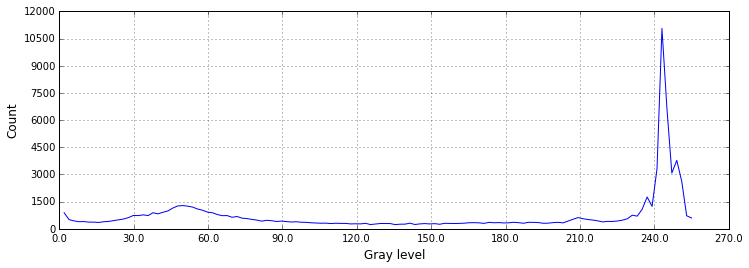

In [5]:
hist, bin = np.histogram(img,bins=128)
p = ryplot.Plotter(1,1,1,figsize=(12,4))
p.plot(1,bin[1:],hist,'', 'Gray level', 'Count');

The following function does the image segmentation and will be called from `widgets.interactive`. The function is given the image and the threshold value to be used in the segmentation.  The image is segmented and displayed inside this function - required because the image must be displayed every time the segmentation threshold is changed.  The function returns the segmented image and threshold value for the image (these returns can be used subsequently elsewhere).  The function displays the histogram of the segmented image, excluding the first bin, which contains the discarded elements, as well as the cumulative probability of the original input image. All this processing takes a while, so the software is sluggish for large images.


In [6]:
def threshold_image(image, thx):
    nimg = np.where(image > thx, image, 0)
    hist, bin = np.histogram(image,bins=128)
    hists, bin = np.histogram(nimg,bins=128)
    cumsum = np.cumsum(hist)/(np.ones(hist.shape) * image.shape[0]*image.shape[1])
    p = ryplot.Plotter(1,1,3,figsize=(14,4))
    p.showImage(1, nimg);
    p.plot(2,bin[2:], hists[1:],'', 'Gray level', 'Count');
    p.plot(3,bin[1:], cumsum,'', 'Gray level', 'Cummulative probability');
    p.plot(3,np.asarray([thx,thx]), np.asarray([0,1]));    
    return nimg,thx

The `widgets.interactive` function is given three types of parameters:   
 - The first parameter is the name of the function to be called when the widget's states changes.
 - Any input data to be passed to the function (any number of parameters).  These inputs must be flagged as inputs by using `widgets.fixed()` function. If so flagged the parameters will not be interpreted as widgets, but as input data.
 - The definition of the widgets to be drawn and interrogated. All parameters not flagged as `widgets.fixed()` are interpreted as widget definitions, either in shorthand form or by explicit definition (see the Granger/Frederic notebooks).

In this case the function is `threshold_image`, and only one data item is passed `img`, and there a float slider widget ranging from 0 to 255, with step increment of 1.0. 

The `interactive` function is used and assigned to a variable.  This is necessary because later we want to use the variable to read the return values from the segmentation function.  The `display` function must be called on the widget variable to display the widget.  Once the widget is displayed, the user can change the slide value, which in turn calls the threshold function, which does the segmentation and displays the image.

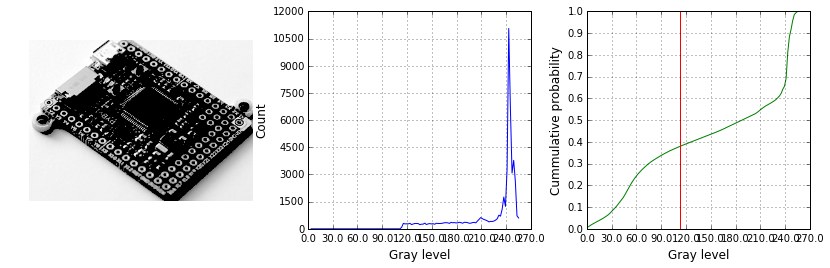

In [7]:
w = interactive(threshold_image, image=widgets.fixed(img), 
                thx=widgets.FloatSlider(value=128, min=0.0, max=255.0, step=1))
display(w)

The segmentation function returns a segmented image and the value of the segmentation threshold.  These values can be accessed after the slider has been moved, as the `result` attribute of the widget.  The inputs to the segmentation function is available in the `kwargs` attribute.